In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm #진행상태를 알려주는 툴(남은시간과 진행현황)
import warnings

In [5]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [4]:
data_dir = Path('../input/') #학습 데이터 로드
trn_file = data_dir / 'train.csv'
seed = 42

In [6]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


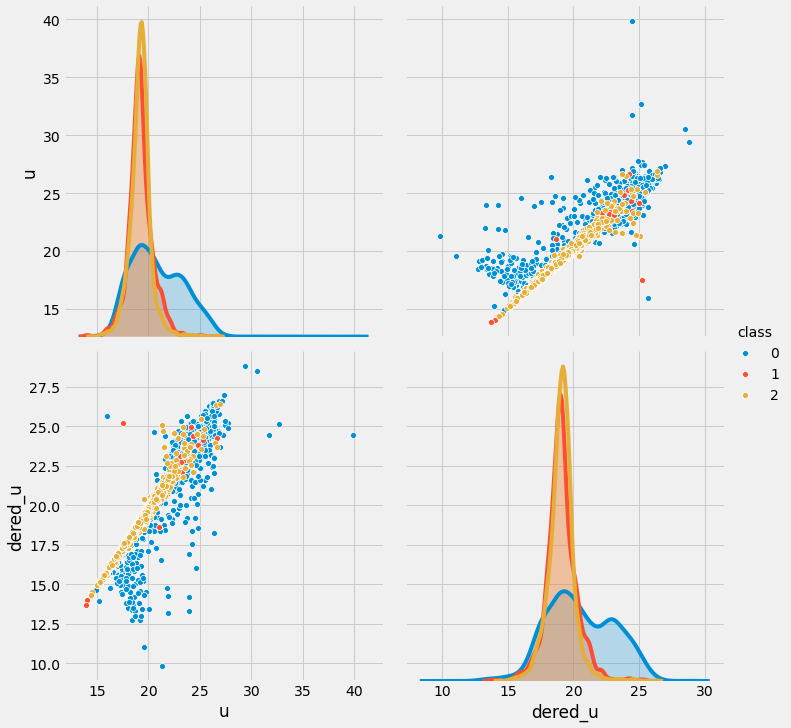

In [14]:
sns.pairplot(trn.sample(n=10000), vars=['u', 'dered_u'], hue='class', size=5)

In [7]:
X = trn[trn['class'] != 0][['u']].values #선형적이지 않은 class 0을 제외하고
#독립변수(u)와 종속변수(dered_u) 추출해내기 // 독립변수 "X"
#values를 이용하여 데이터 추출
y = trn[trn['class'] != 0]['dered_u'].values #종속변수 "y"
print(X.shape, y.shape) #x와 y를 shape명령어를 통해 matrix형태로 출력

(200004, 1) (200004,)


In [8]:
rmse = lambda y, p: np.sqrt(np.mean((y - p) ** 2)) #손실함수 정의
#lambda 함수를 이용하여 손쉽게 함수를 정의한다.
#실제값 y와 prediction값인 p의 오차를 "**"(제곱)을 해서 평균을 구한것을 루트로 씌운다.
#루트 민 스퀘어 에러 = 평균제곱근오차 >> 이 수치가 낮을수록 정밀도가 좋은것
#why? => 오차를 제곱하여 양수값을낸것에 평균을 구하여 제곱하였으니
#값이 낮을수록 오차가 낮은것이다.

In [9]:
alpha = .001 #선형회귀를 하기위해서 알파값 선정
theta0 = .1 #세타 0의 초기값 지정
theta1 = .1 #세타 1의 초기값 지정
epoch = 4 #전체 샘플을 몇번 반복을 해서 이 값들 계산할건지 // 여기서는 4번 반복

In [11]:
x = X.flatten() #2차원 함수인 x를  flatten함수를 이용해 1차원으로 변형해준다.
#벡터로 바꾼다.
print(x.shape)

(200004,)


In [12]:
rmses = []   #경사하강법
for i in tqdm(range(epoch)): #range함수를 이용해 4만큼 숫자를 만들어냄 >> 4번 반복
    for x_i, y_i in zip(x, y): 
        p_i =  theta0 + theta1 * x_i #각각의 샘플에 대해서 예측값 구함
        theta0 = theta0 + alpha * (y_i - p_i) #세타 0 구하기
        theta1 = theta1 + alpha * (y_i - p_i) * x_i #세타 1 구하기
    rmses.append(rmse(y, theta0 + theta1 * x)) #에러를 계산하여 append함수를 이용
    #해당 값을 rmses에 추가한다.

In [20]:
theta1, theta0

(0.9362306162023849, 1.1088813148478316)

In [21]:
rmses #점점 값이 내려가는걸 확인할 수 있다.

[0.25618215910731906,
 0.25492967552380746,
 0.25461791287963526,
 0.25454708923095914]

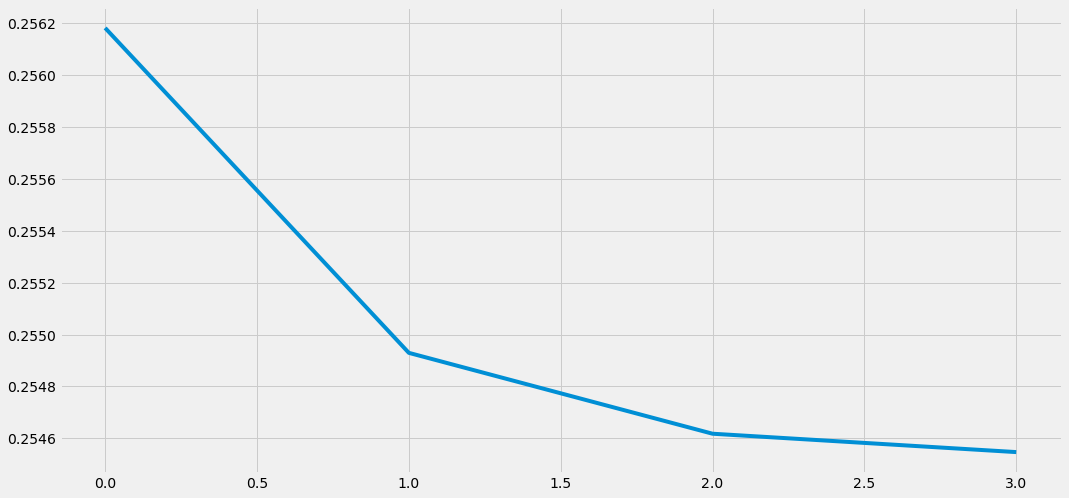

In [22]:
plt.plot(rmses) #경사하강법을 통해서 내려가는 값을 다음 그래프로 확인

Text(0, 0.5, 'dered_u')

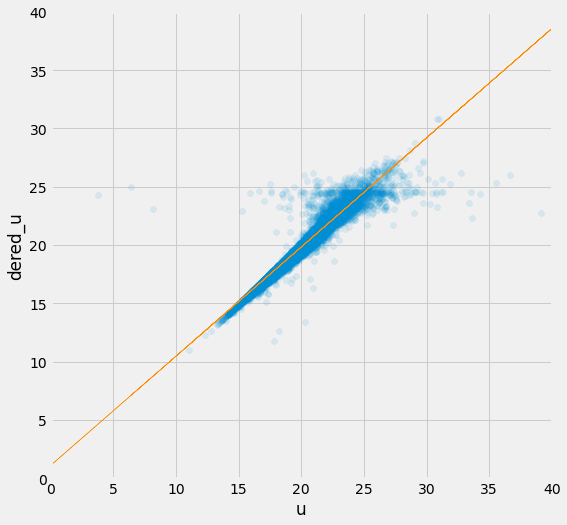

In [23]:
#파란점들이 실제값, 주황색 선은 선형회귀 모델의 예측선이다.
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, theta0 + theta1 * x, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

In [24]:
#scikit-learn을 이용한 선형회귀
#sklearn 함수에 선형회귀 함수 구하는것이 내포되어있다. 위의 선형회귀 모델구하기보다
#보다 더 쉽게 구할 수 있음
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
p = lr.predict(X)

In [25]:
rmse(y, p)

0.2522450693360897

In [26]:
lr.coef_, lr.intercept_

(array([0.9320425]), 1.1556424178625448)

Text(0, 0.5, 'dered_u')

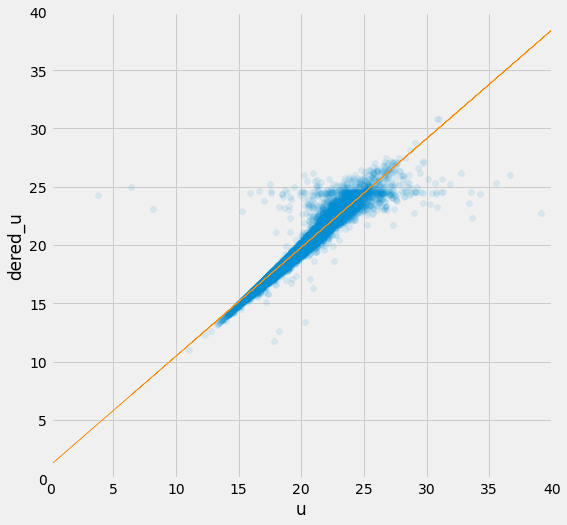

In [27]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, p, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

In [16]:
#scikit-learn을 이용한 로지스틱회귀 //ex) 성별, 암여부같이 종속변수가 범주형 변수일때
#0~1사이의 값을 출력한다.
X = trn[trn['class'] != 0].drop('class', axis=1) #클래스가 0인 범주를 제외하고
#클래스가 1이나 2인 데이터를 가지고 종속변수와 독립변수를 추출해본다.
y = trn[trn['class'] != 0]['class'].values - 1

In [17]:
np.unique(y)

array([0, 1])

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

lr = LogisticRegression()
lr.fit(X, y)
p = lr.predict_proba(X)[:, 1]

In [19]:
lr.coef_, lr.intercept_

(array([[ 0.81816766,  0.06877279, -1.86825419,  0.52084139, -0.54076988,
         -1.5818335 ,  2.26036334, -0.06305962, -1.35907681,  0.5767069 ,
         -0.59869336,  0.08472584, -0.10091584, -0.14107375, -0.1437116 ,
         -0.1385806 , -0.13981026, -0.14237537]]),
 array([0.22167921]))

In [20]:
log_loss(y, p)

0.3656617168706545

In [21]:
roc_auc_score(y, p)

0.8763009643015962

In [22]:
from sklearn.metrics import roc_curve, precision_recall_curve

def plot_roc_curve(y, p):
    fpr, tpr, _ = roc_curve(y, p)

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


def plot_pr_curve(y, p):
    precision, recall, _ = precision_recall_curve(y, p)

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
 

Text(0.5, 1.0, 'Precision-Recall Curve')

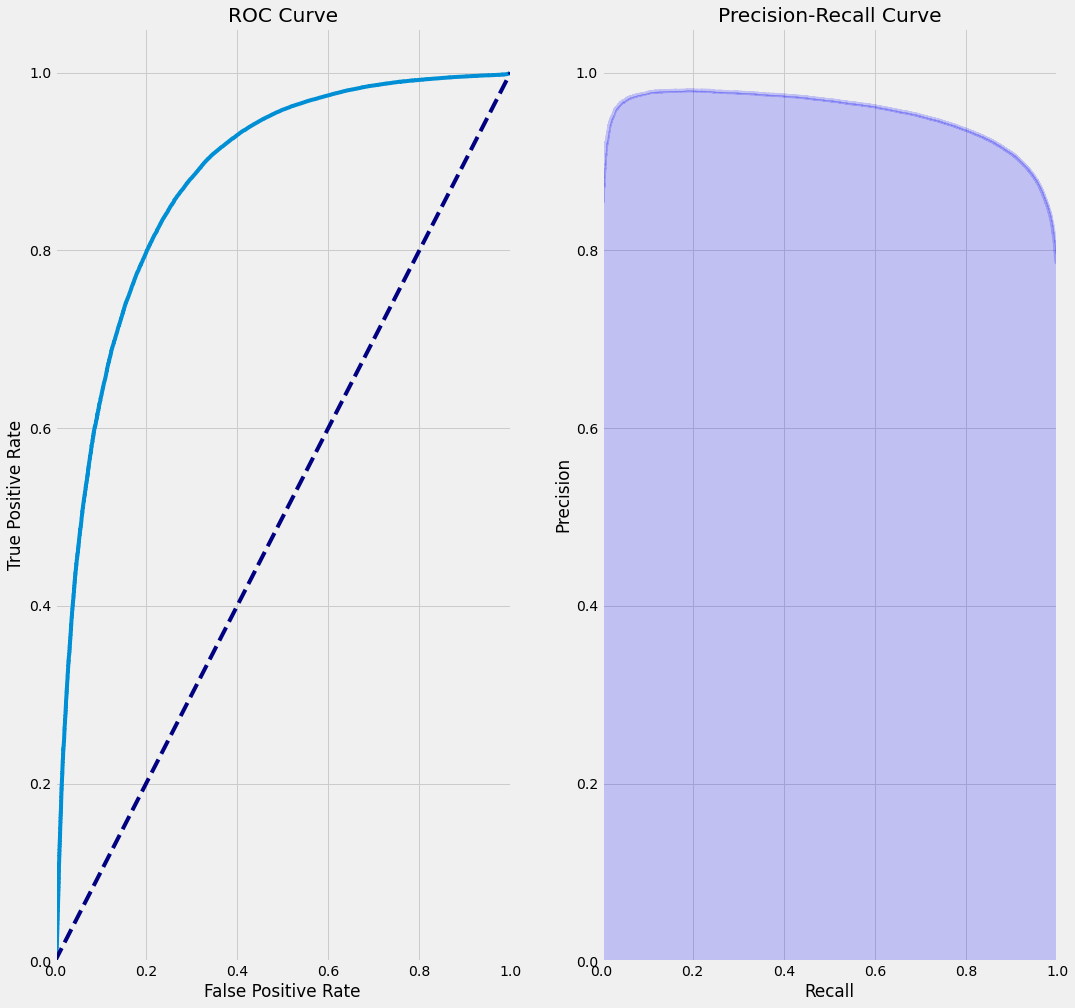

In [23]:
#범주형 데이터를 분석할때는 ROC curve와 Precision-recall curve를 자주 사용함
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plot_roc_curve(y, p);
plt.title('ROC Curve')
plt.subplot(1, 2, 2)
plot_pr_curve(y, p);
plt.title('Precision-Recall Curve')